In [1]:
import pandas as pd
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import time
start_time = time.time()

In [2]:
prize = 10000000        #房价
prize -= 0.3 * prize    # 假设房价30%首付已经具备
interest_rate_year = 0.05   #年利率
loan_terms_year = 15    #贷款年限

In [3]:
def average_capital(prize, interest_rate_year, loan_terms_year):
    """
    等额本金
    :param prize: 房价
    :param interest_rate_year: 年利率
    :param loan_terms_year: 贷款年限
    :return: 总还款，总利息，每月还款，每月本金，每月利息
    """
    total_interest = 0  # 总利息
    total_payment = 0   # 总还款
    monthly_payment_list = []   # 记录每月还款
    monthly_payment_capital_list = []   # 记录每月本金
    monthly_payment_interest_list = []   # 记录每月利息
    monthly_capital = prize / (loan_terms_year * 12)    # 每月本金
    for i in range(loan_terms_year * 12):   
        monthly_interest = prize * interest_rate_year / 12  # 每月利息
        total_interest += monthly_interest
        monthly_payment = monthly_capital + monthly_interest
        total_payment += monthly_payment

        monthly_payment_list.append(monthly_payment)
        monthly_payment_capital_list.append(monthly_capital)
        monthly_payment_interest_list.append(monthly_interest)

        prize -= monthly_capital
    return total_payment, total_interest, monthly_payment_list, monthly_payment_capital_list, monthly_payment_interest_list


def average_capital_plus_interest(prize, interest_rate_year, loan_terms_year):
    """
    等额本息
    :param prize: 房价
    :param interest_rate_year: 年利率
    :param loan_terms_year: 贷款年限
    :return: 总还款，总利息，每月还款，每月本金，每月利息
    """
    total_interest = 0  # 总利息
    total_payment = 0   # 总还款
    monthly_payment_list = []   # 记录每月还款
    monthly_payment_capital_list = []   # 记录每月本金
    monthly_payment_interest_list = []   # 记录每月利息
    monthly_payment = (prize * interest_rate_year / 12) * (1 + interest_rate_year / 12) ** (loan_terms_year * 12) / ((1 + interest_rate_year / 12) ** (loan_terms_year * 12) - 1)
    for i in range(loan_terms_year * 12):
        monthly_interest = prize * interest_rate_year / 12
        total_interest += monthly_interest
        total_payment += monthly_payment

        monthly_payment_list.append(monthly_payment)
        monthly_payment_capital_list.append(monthly_payment - monthly_interest)
        monthly_payment_interest_list.append(monthly_interest)

        prize -= monthly_payment - monthly_interest
    return total_payment, total_interest, monthly_payment_list, monthly_payment_capital_list, monthly_payment_interest_list


In [4]:
# 总额，总利息，每月还款，每月还款中的本金部分，每月还款中的利息部分
# 等额本金
total_payment_capital, total_interest_capital, monthly_payment_list_capital, monthly_payment_capital_list_capital, monthly_payment_interest_list_capital = average_capital(prize, interest_rate_year, loan_terms_year)
# 等额本息
total_payment_capital_plus_interest, total_interest_capital_plus_interest, monthly_payment_list_capital_plus_interest, monthly_payment_capital_list_capital_plus, monthly_payment_interest_list_capital_plus = average_capital_plus_interest(prize, interest_rate_year, loan_terms_year)

In [5]:
tt_pay1,tt_interest1, mon_pay1, mon_cap1, mon_interest1 = average_capital(prize, interest_rate_year, loan_terms_year)
tt_pay2,tt_interest2, mon_pay2, mon_cap2, mon_interest2 = average_capital_plus_interest(prize, interest_rate_year, loan_terms_year)

In [6]:
total_payment_capital, total_payment_capital_plus_interest
tt_pay1,tt_pay2

(9639583.333333327, 9963999.696943508)

In [7]:
total_interest_capital, total_interest_capital_plus_interest
tt_interest1,tt_interest2

(2639583.333333326, 2963999.6969434447)

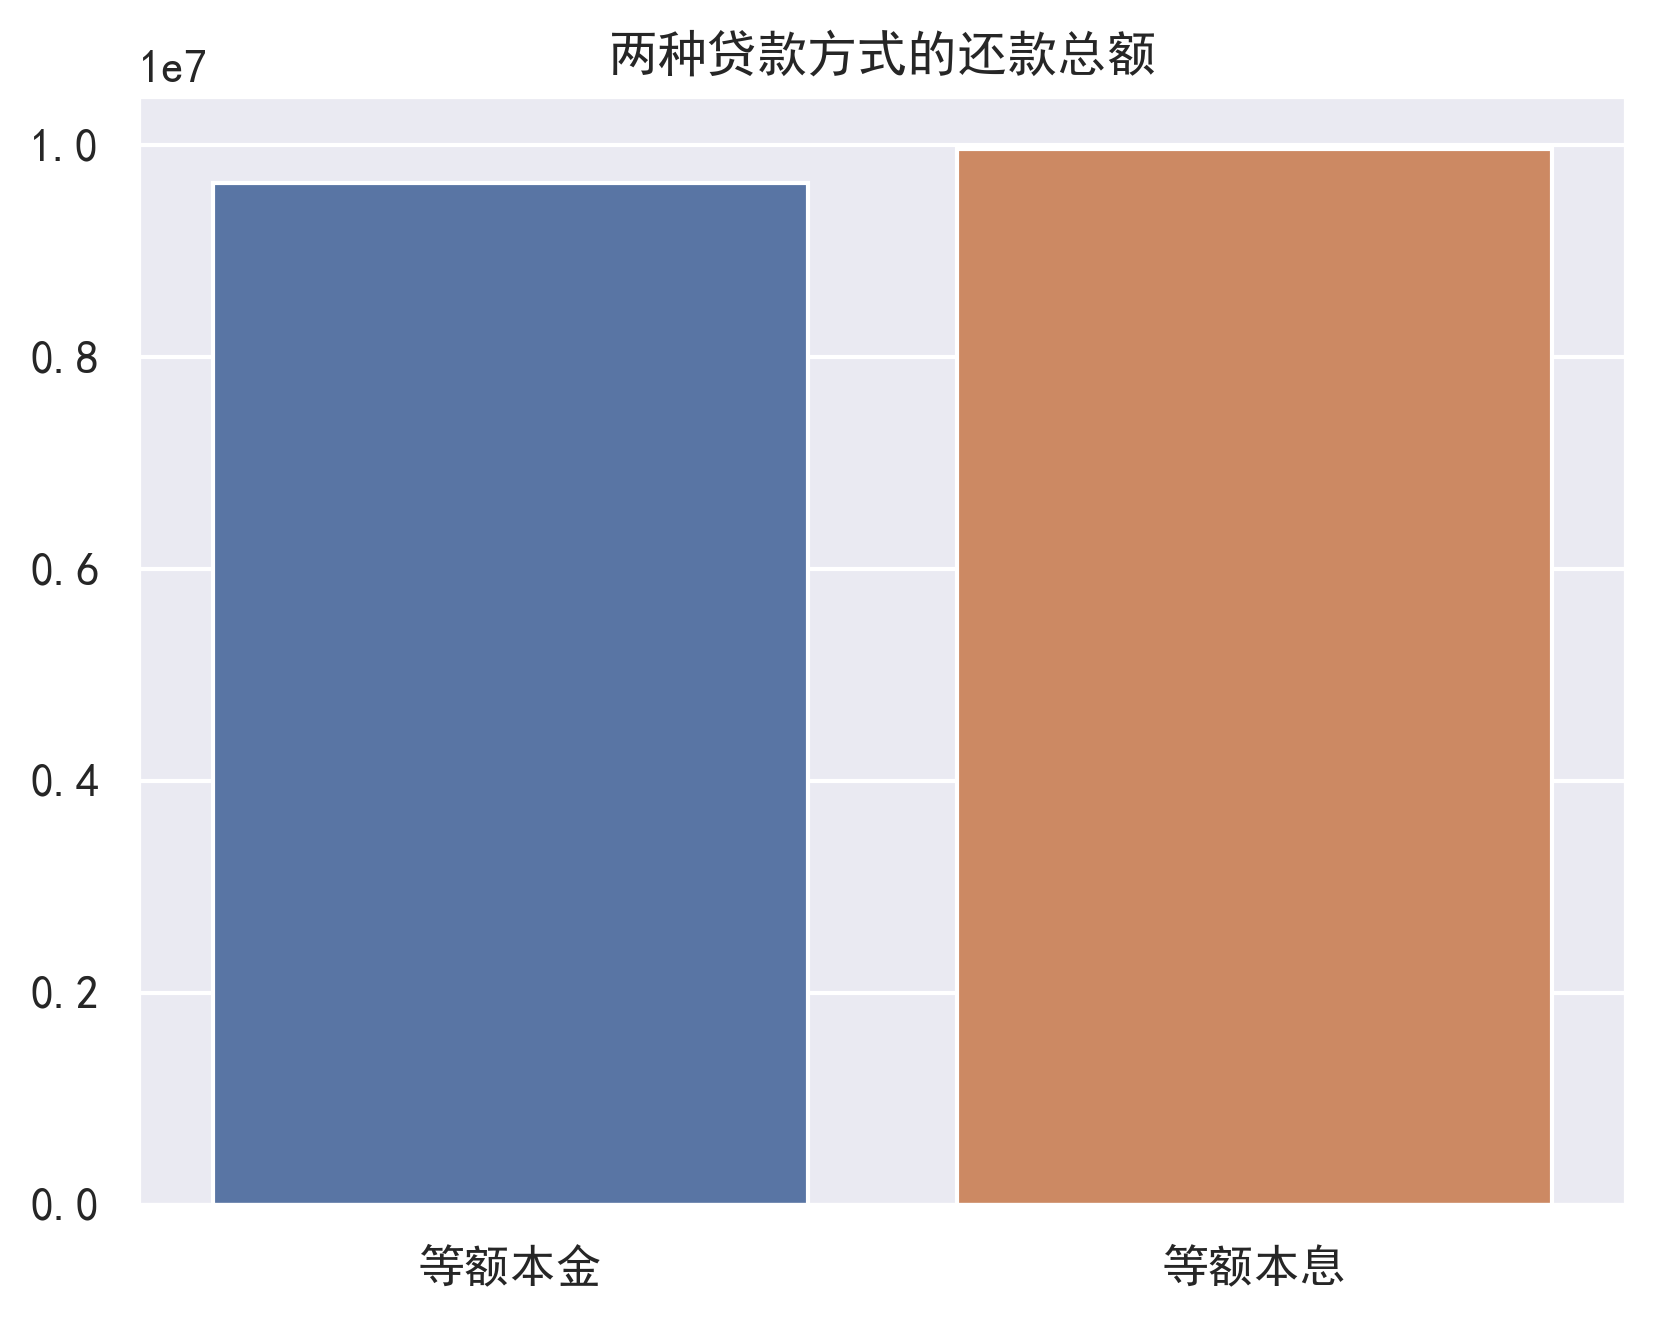

In [8]:
# 比较等额本金、等额本息两种贷款方式的还款压力
data = {
    'Loan Type': ['等额本金', '等额本息'],
    'Total Payments': [tt_pay1, tt_pay2]
}
sns.barplot(x='Loan Type', y='Total Payments', data=data)
plt.title('两种贷款方式的还款总额')
plt.show()

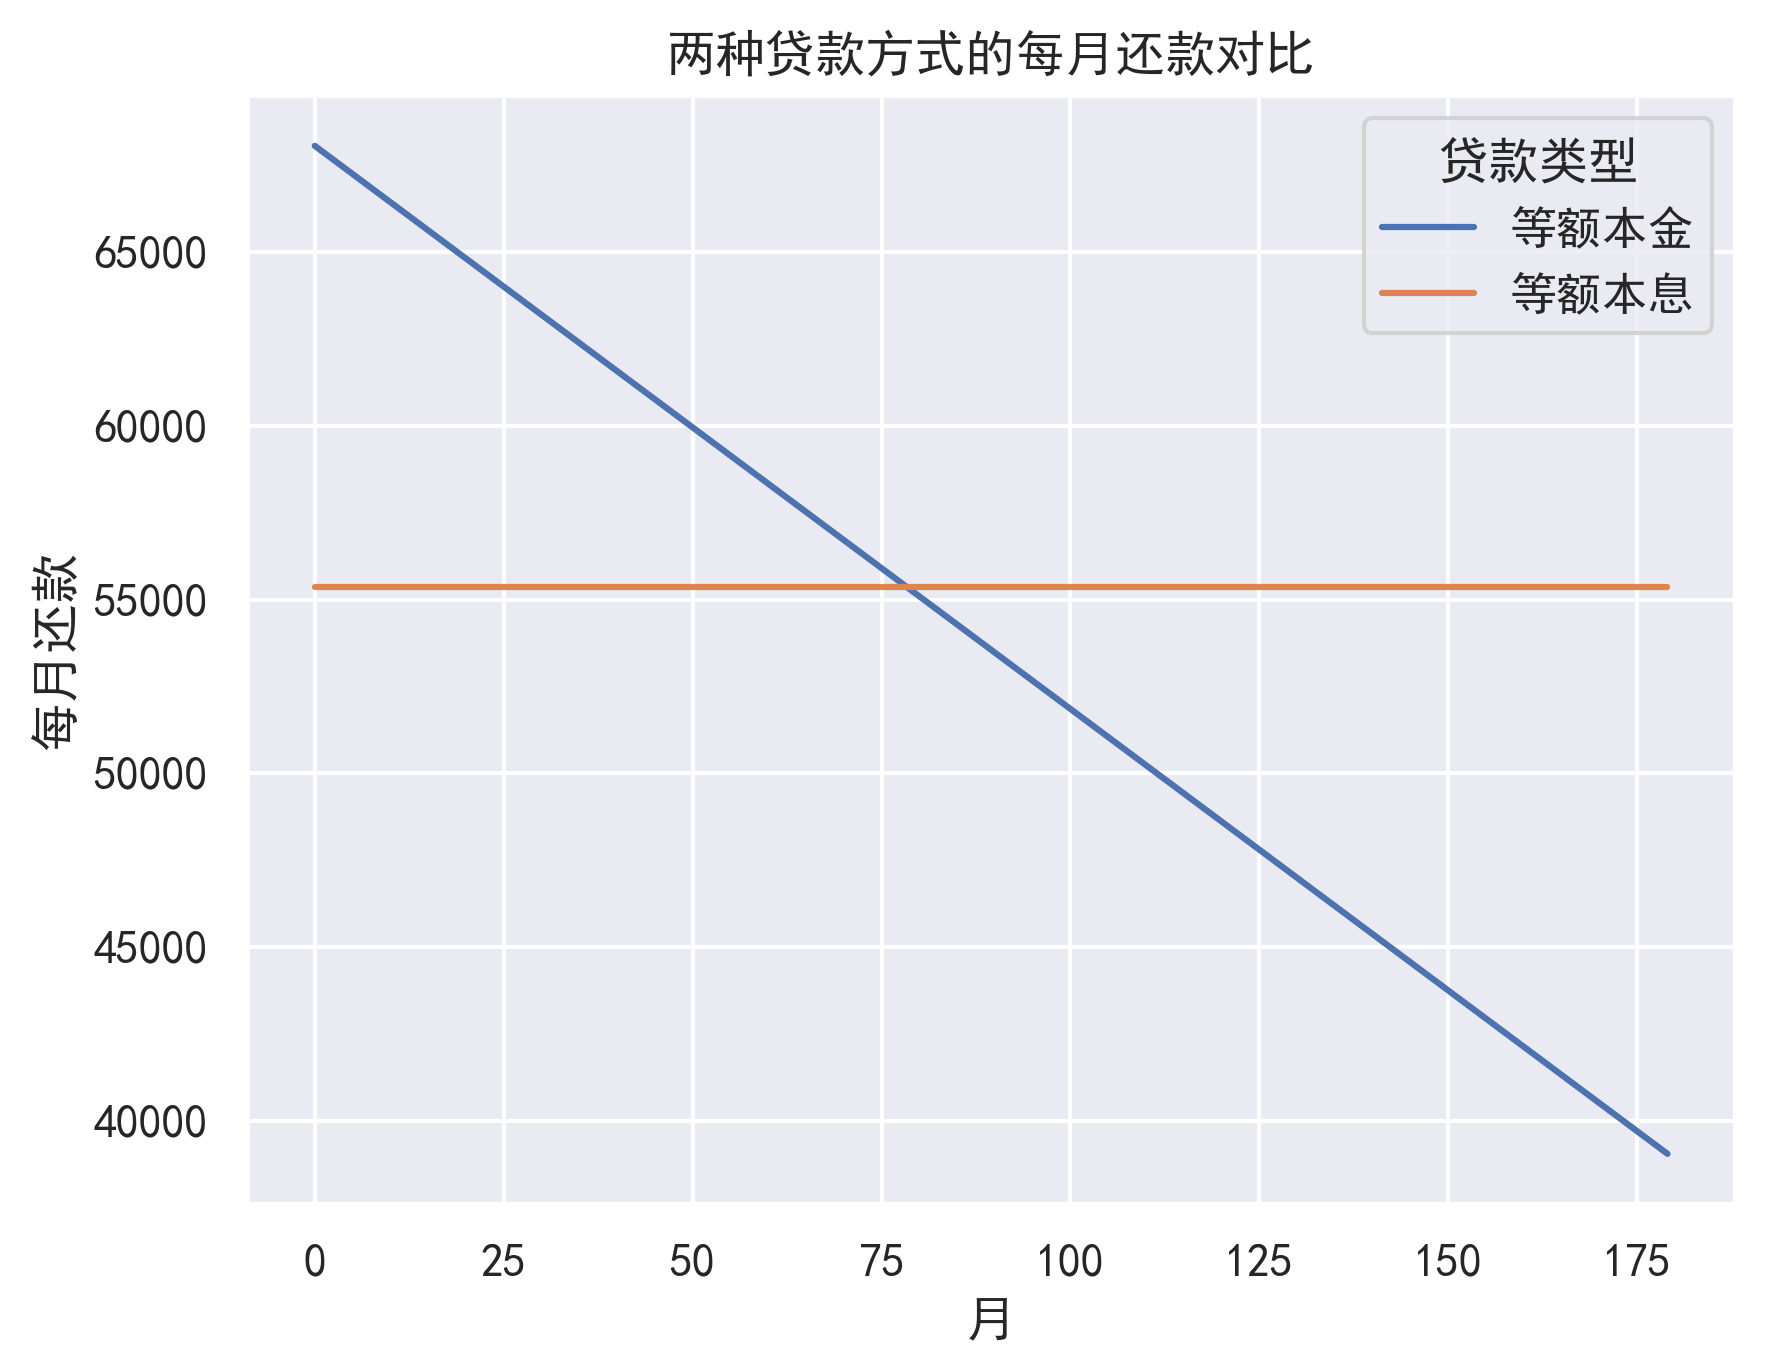

In [9]:
# 比较等额本金、等额本息两种贷款方式的还款压力
data = {
    'Month': list(range(loan_terms_year * 12)),
    '等额本金': mon_pay1,
    '等额本息': mon_pay2
}
df = pd.melt(pd.DataFrame(data), id_vars=['Month'], var_name='Loan Type', value_name='Monthly Payment')
sns.lineplot(x='Month', y='Monthly Payment', hue='Loan Type', data=df)
plt.title('两种贷款方式的每月还款对比')
plt.xlabel("月")
plt.ylabel("每月还款")
# 设置标签
plt.legend(title='贷款类型')
plt.show()

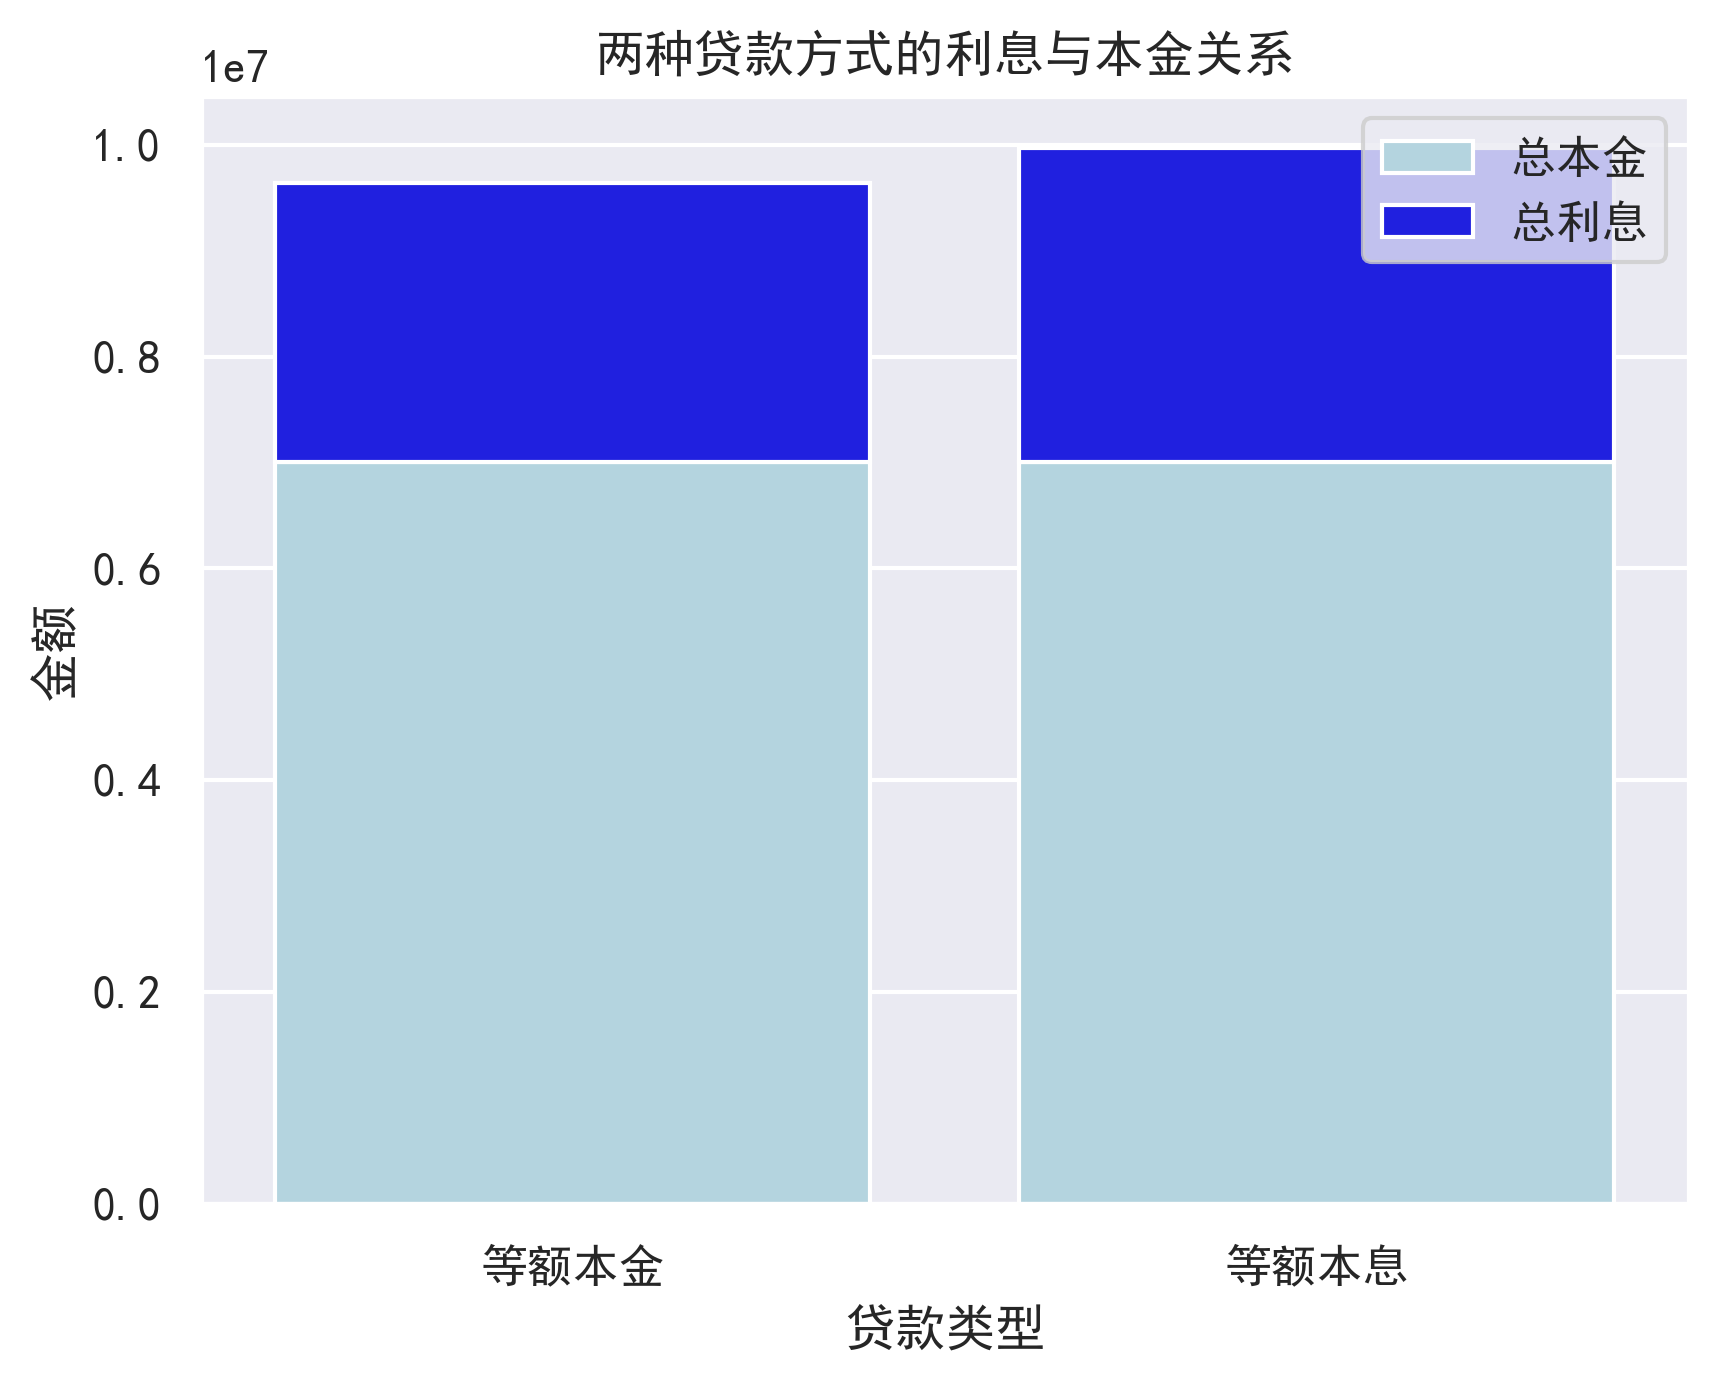

In [10]:
# 比较等额本金、等额本息两种贷款方式的利息与本金关系
data = {
    '贷款类型': ['等额本金', '等额本息'],
    '总利息': [total_interest_capital, total_interest_capital_plus_interest],
    '总本金': [prize, prize]
}
df = pd.DataFrame(data)
sns.barplot(x='贷款类型', y='总本金', data=df, label='总本金', color='lightblue')
sns.barplot(x='贷款类型', y='总利息', data=df, label='总利息', bottom=df['总本金'], color='blue')
plt.title('两种贷款方式的利息与本金关系')
plt.ylabel('金额')
plt.legend()
plt.show()

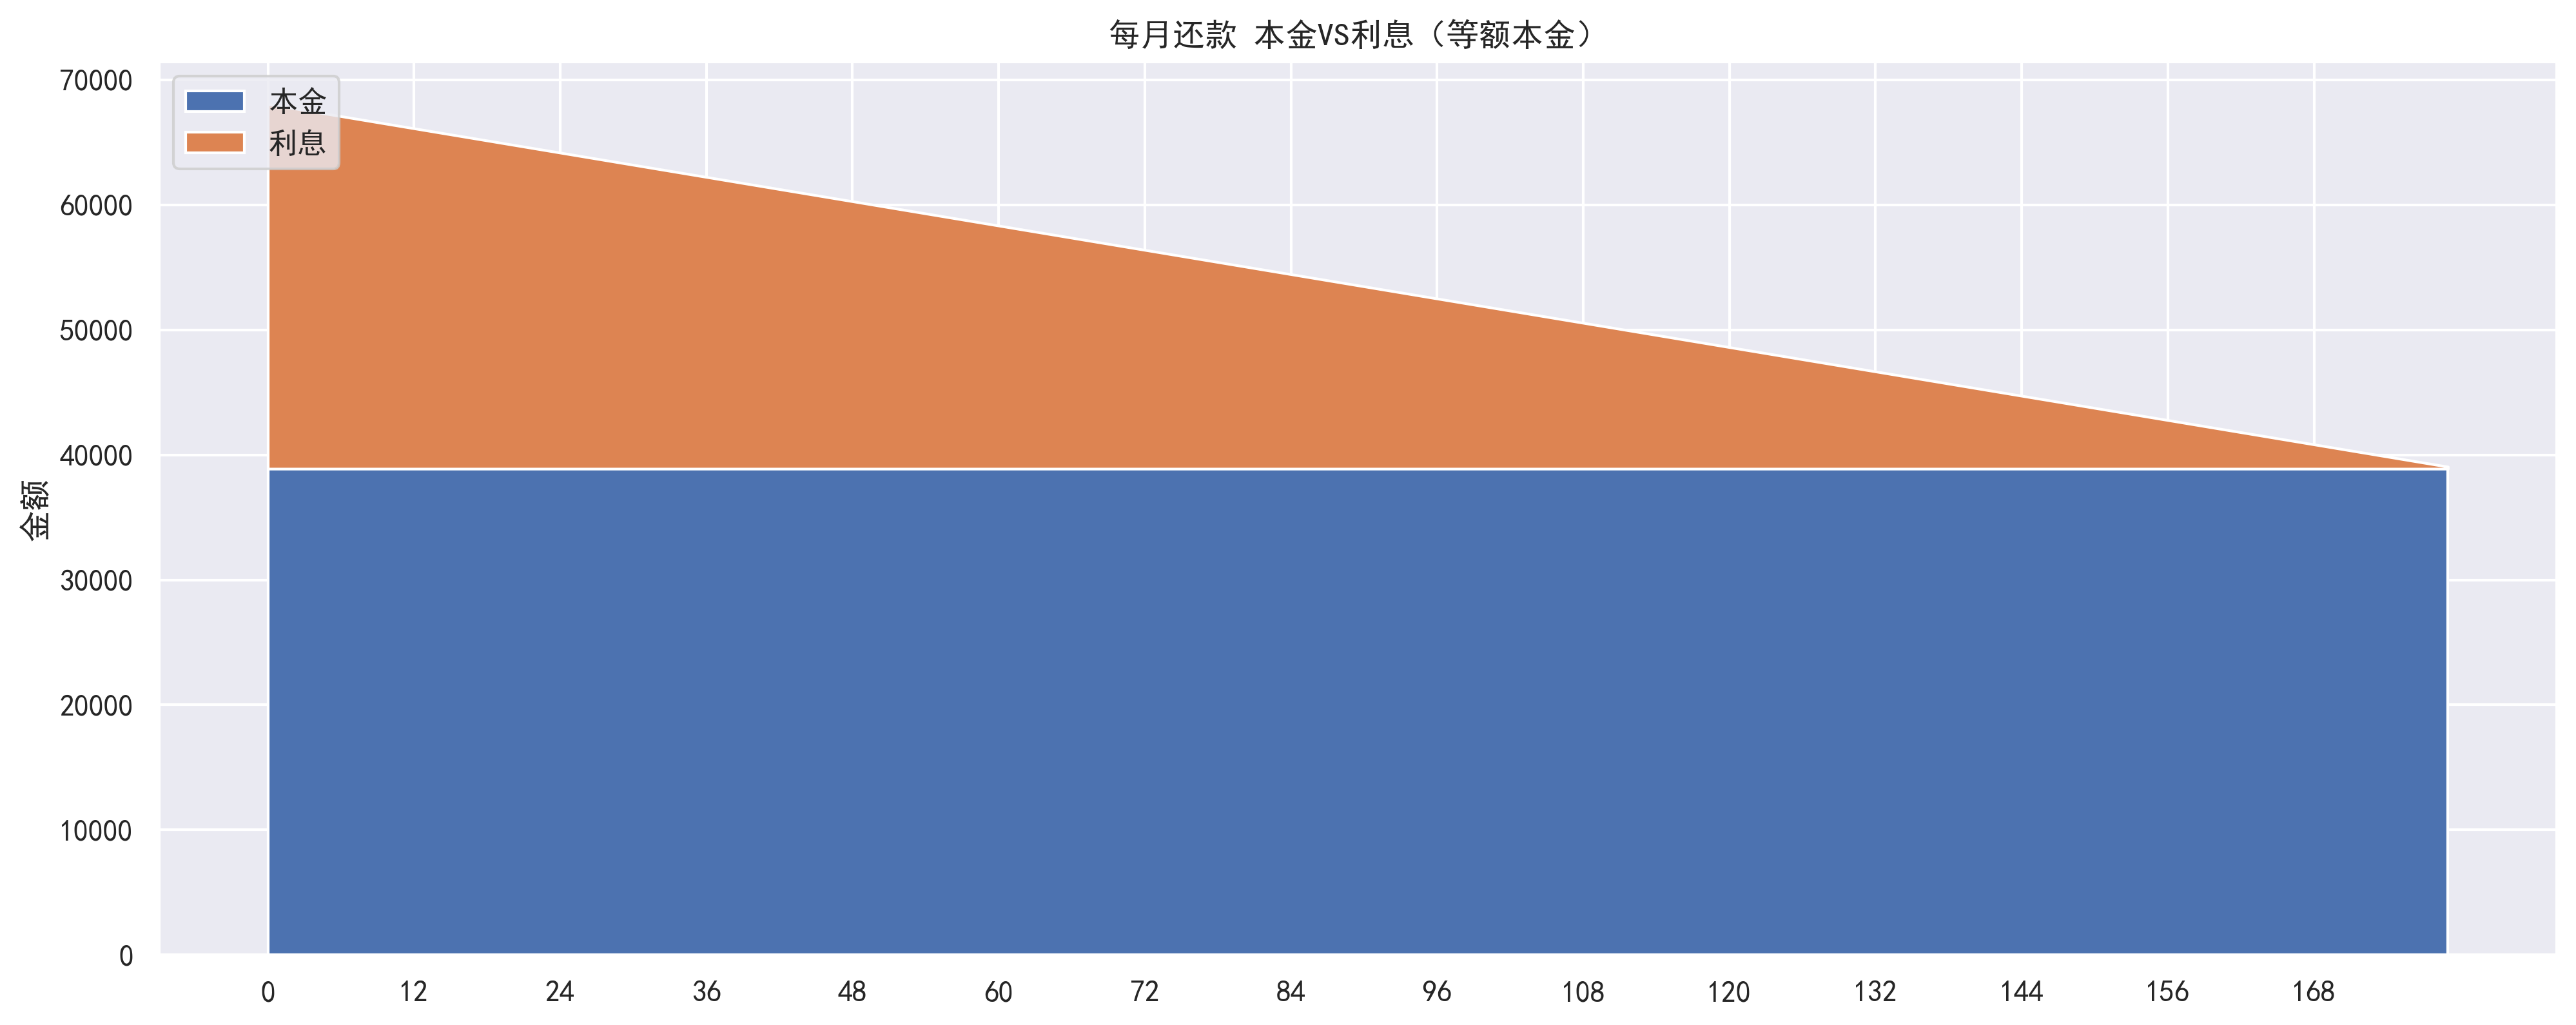

In [11]:
data = {
    '月': list(range(loan_terms_year * 12)),
    '本金': mon_cap1,
    '利息': mon_interest1
}
df = pd.DataFrame(data)
plt.figure(figsize=(16, 6))
plt.stackplot(df['月'], df['本金'], df['利息'], labels=['本金','利息'])
plt.xticks(ticks=df['月'][::12])
plt.title('每月还款 本金VS利息（等额本金）')
plt.ylabel('金额')
plt.legend(loc='upper left')
plt.show()

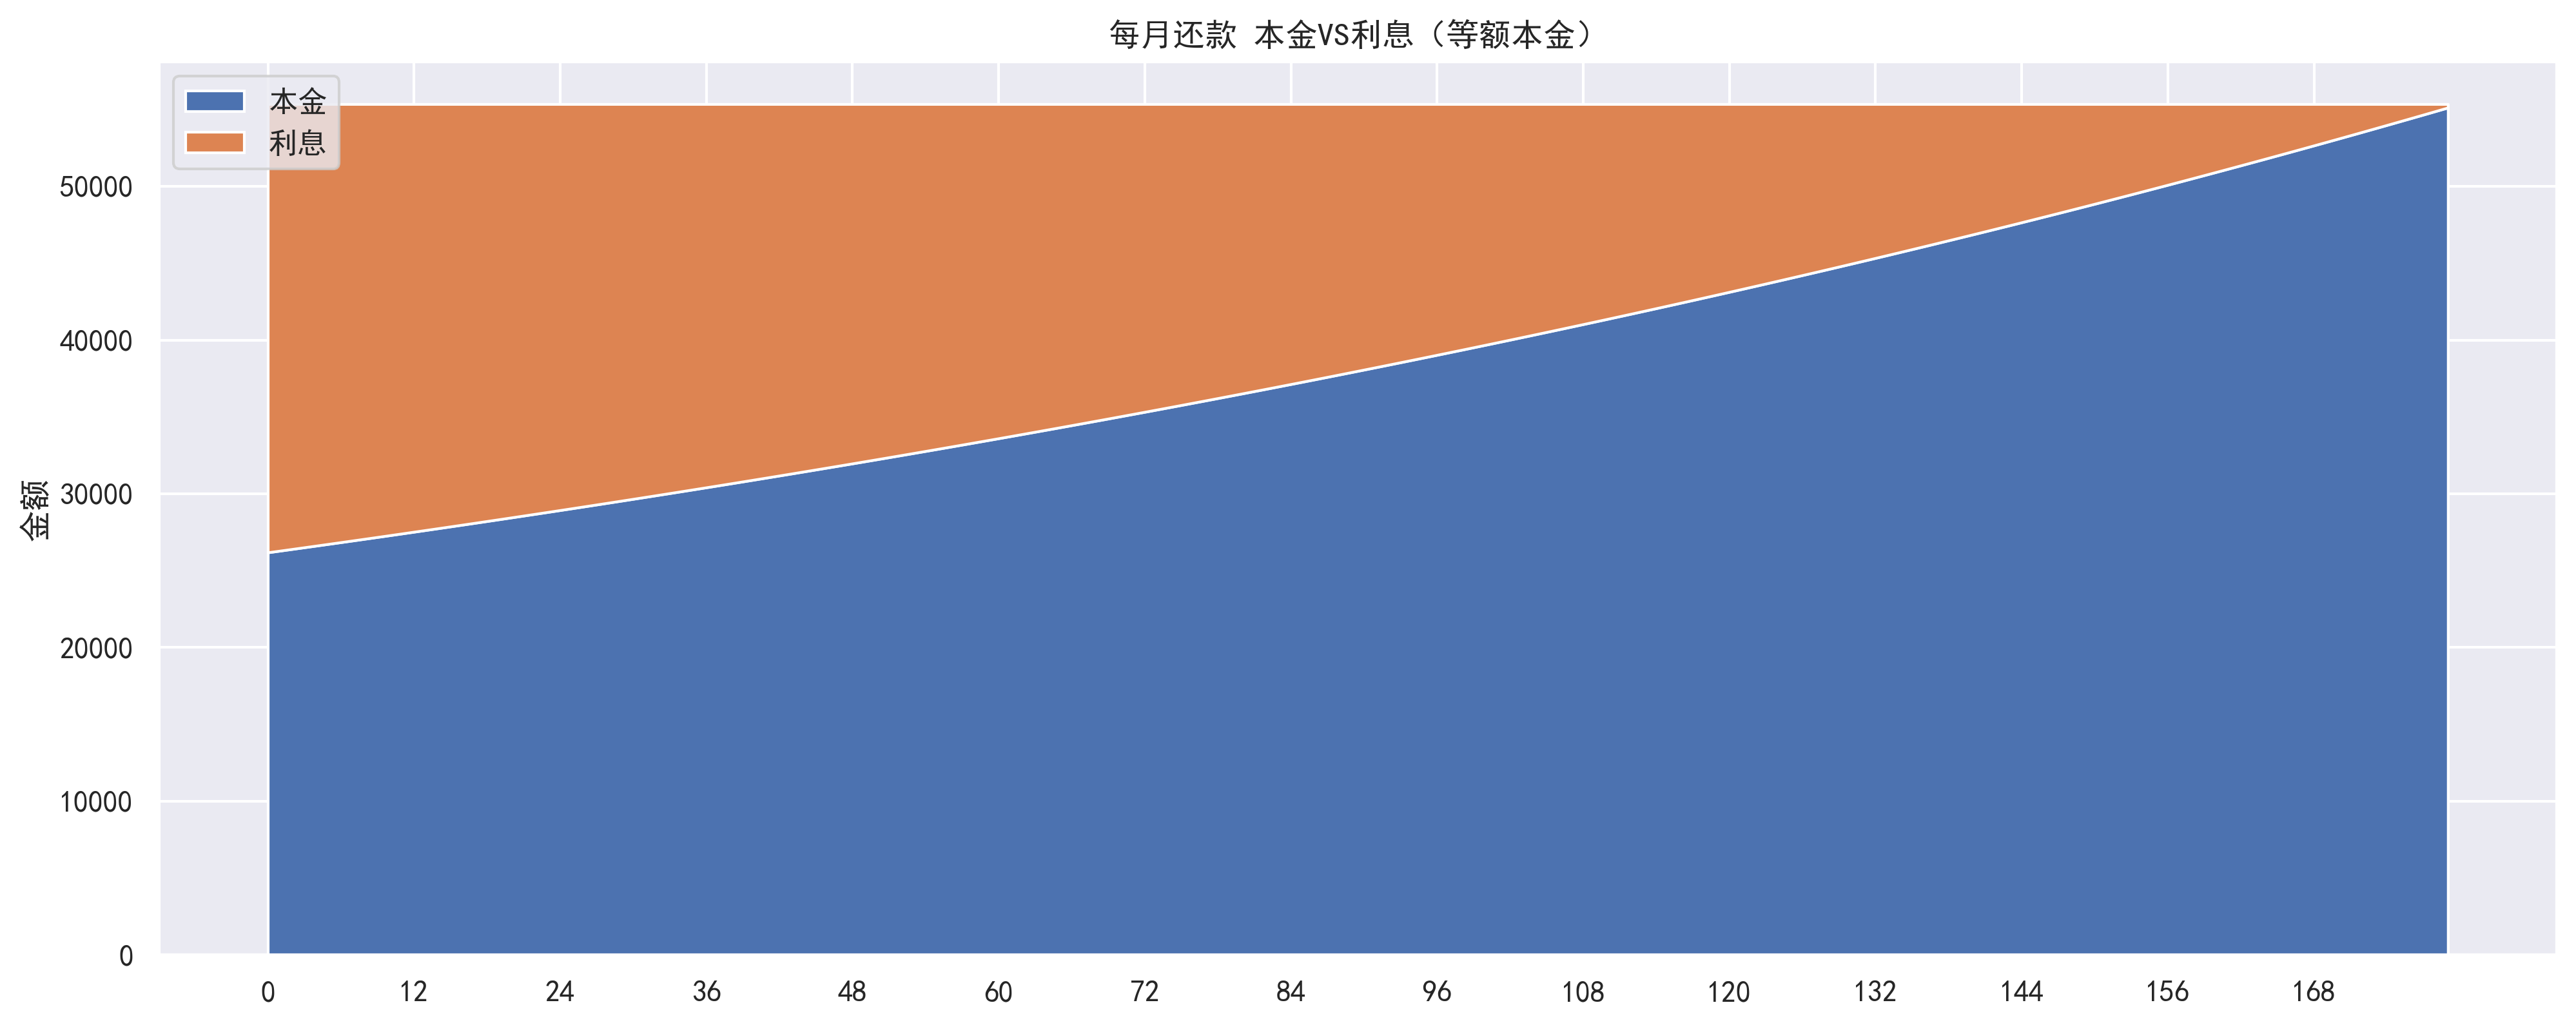

In [12]:
data = {
    '月': list(range(loan_terms_year * 12)),
    '本金': mon_cap2,
    '利息': mon_interest2
}
df = pd.DataFrame(data)
plt.figure(figsize=(16, 6))
plt.stackplot(df['月'], df['本金'], df['利息'], labels=['本金','利息'])
plt.xticks(ticks=df['月'][::12])
plt.title('每月还款 本金VS利息（等额本金）')
plt.ylabel('金额')
plt.legend(loc='upper left')
plt.show()

In [13]:
print("程序运行时间：", time.time() - start_time)

程序运行时间： 1.8944261074066162
